In [5]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt

In [4]:
df1 = pd.read_excel('D:/Programming/Data analytics/static/Week 7/Week 7 (Important Data)-20220714T173612Z-001/Week 7 (Important Data)/icecream.xlsx')
df1

,Student_Population,Sales
0,2,58
1,6,105
2,8,88
3,8,118
4,12,117
5,16,137
6,20,157
7,20,169
8,22,149
9,26,202


# Standardized Residual Plot

In [6]:
Reg1 = ols(formula="Sales ~ Student_Population", data=df1)
Fit1 = Reg1.fit()
print(Fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           2.55e-05
Time:                        23:05:01   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             60.0000      9

c:\Users\SOUMYAPANJA\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [7]:
print(anova_lm(Fit1))

                     df   sum_sq   mean_sq          F    PR(>F)
Student_Population  1.0  14200.0  14200.00  74.248366  0.000025
Residual            8.0   1530.0    191.25        NaN       NaN


In [8]:
influence = Fit1.get_influence()
resid_student = influence.resid_studentized_external

In [9]:
resid_student

array([-1.09212653,  1.26798654, -0.94196706,  1.54023214, -0.21544891,
       -0.21544891, -0.22263461,  0.68766487, -2.01063738,  1.09212653])

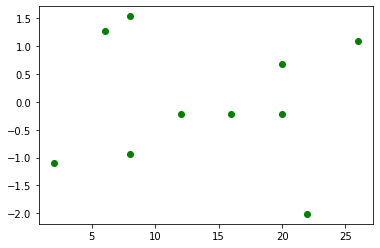

In [11]:
plt.figure()
plt.scatter(df1['Student_Population'], resid_student, color = "green")

# Normal Probability Plot

In [12]:
from scipy import stats
import statsmodels.api as sm

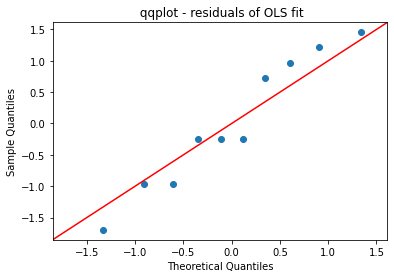

In [13]:
res = Fit1.resid # Residuals
probplot = sm.ProbPlot(res, stats.norm, fit=True)
fig = probplot.qqplot(line='45')
h = plt.title(' qqplot - residuals of OLS fit')
plt.show()